In [1]:
#Importamos las librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/tienda_ventas.csv')
df

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.00000,0
1,1,2013-01-01,1,BABY CARE,0.00000,0
2,2,2013-01-01,1,BEAUTY,0.00000,0
3,3,2013-01-01,1,BEVERAGES,0.00000,0
4,4,2013-01-01,1,BOOKS,0.00000,0
...,...,...,...,...,...,...
2161561,2161561,2016-04-30,9,POULTRY,826.35300,0
2161562,2161562,2016-04-30,9,PREPARED FOODS,165.65399,0
2161563,2161563,2016-04-30,9,PRODUCE,2012.72700,1
2161564,2161564,2016-04-30,9,SCHOOL AND OFFICE SUPPLIES,10.00000,0


In [5]:
# Agrupo por fecha y tienda
agrupacion = df[['date', 'store_nbr','sales']].groupby(['date', 'store_nbr']).sum()
agrupacion


sales
date       store_nbr             
2013-01-01 1              0.00000
           2              0.00000
           3              0.00000
           4              0.00000
           5              0.00000
...                           ...
2016-04-30 50         28714.33899
           51         29343.87600
           52             0.00000
           53         20876.46297
           54          9560.80800

[65502 rows x 1 columns]

In [6]:

df['store_nbr'].unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
        7,  8,  9], dtype=int64)

In [7]:
#Cuentos cuantos tengo
len(df['store_nbr'].unique())

54

In [108]:
df['periodo'] = df['date'].apply(lambda x: x[:7])
df

,id,date,store_nbr,family,sales,onpromotion,mes,periodo
0,0,2013-01-01,1,AUTOMOTIVE,0.00000,0,2013-01,2013-01
1,1,2013-01-01,1,BABY CARE,0.00000,0,2013-01,2013-01
2,2,2013-01-01,1,BEAUTY,0.00000,0,2013-01,2013-01
3,3,2013-01-01,1,BEVERAGES,0.00000,0,2013-01,2013-01
4,4,2013-01-01,1,BOOKS,0.00000,0,2013-01,2013-01
...,...,...,...,...,...,...,...,...
2161561,2161561,2016-04-30,9,POULTRY,826.35300,0,2016-04,2016-04
2161562,2161562,2016-04-30,9,PREPARED FOODS,165.65399,0,2016-04,2016-04
2161563,2161563,2016-04-30,9,PRODUCE,2012.72700,1,2016-04,2016-04
2161564,2161564,2016-04-30,9,SCHOOL AND OFFICE SUPPLIES,10.00000,0,2016-04,2016-04


In [109]:
# Me interesa saber como ha sido historicamente la venta de las tiendas
sales_store = df[['store_nbr','sales']].groupby(['store_nbr']).agg({
    'sales': 'sum'
})
sales_store

,sales
store_nbr,
1,9.181626e+06
2,1.410272e+07
3,3.267186e+07
4,1.247039e+07
5,1.087617e+07
6,1.655468e+07
7,1.720570e+07
8,1.975790e+07
9,1.752849e+07


In [110]:
sales_store = sales_store.sort_values('sales', ascending=False)
sales_store

,sales
store_nbr,
44,4.063205e+07
45,3.511369e+07
47,3.292287e+07
3,3.267186e+07
46,2.766196e+07
49,2.645239e+07
48,2.392486e+07
51,2.179748e+07
8,1.975790e+07


In [111]:
df_top5 = sales_store.head(5)
df_top5

,sales
store_nbr,
44,4.063205e+07
45,3.511369e+07
47,3.292287e+07
3,3.267186e+07
46,2.766196e+07


In [112]:

# Puedo hacer esto con un .drop() por indices
df_otros = sales_store.drop(index=df_top5.index.values)
df_otros

,sales
store_nbr,
49,2.645239e+07
48,2.392486e+07
51,2.179748e+07
8,1.975790e+07
11,1.894815e+07
50,1.886169e+07
9,1.752849e+07
7,1.720570e+07
6,1.655468e+07


In [113]:
# Pongo el indice como columna en mi dataset de top 4
df_otros = df_otros.reset_index()
df_otros

,store_nbr,sales
0,49,2.645239e+07
1,48,2.392486e+07
2,51,2.179748e+07
3,8,1.975790e+07
4,11,1.894815e+07
5,50,1.886169e+07
6,9,1.752849e+07
7,7,1.720570e+07
8,6,1.655468e+07
9,24,1.533942e+07


In [114]:
#Identifico los registros con sales 0 para quitarlos de la operacion

id_drop=[]
for index, row in df_otros.iterrows():
    if row['sales'] == 0:
        id_drop.append(index)
print(id_drop)

[48]


In [115]:
# Puedo hacer esto con un .drop() por indices
df_otros_final = df_otros.drop(index=id_drop, axis=1)
df_otros_final

,store_nbr,sales
0,49,2.645239e+07
1,48,2.392486e+07
2,51,2.179748e+07
3,8,1.975790e+07
4,11,1.894815e+07
5,50,1.886169e+07
6,9,1.752849e+07
7,7,1.720570e+07
8,6,1.655468e+07
9,24,1.533942e+07


In [116]:
df_top5 = df_top5.reset_index('store_nbr')

In [117]:
df_top5['store_nbr'].unique()

array([44, 45, 47,  3, 46], dtype=int64)

In [118]:
# Filtraremos el DataFrame original solo con estas tiendas
df_top_5_final = df[df['store_nbr'].isin(df_top5['store_nbr'].unique())]
df_top_5_final

,id,date,store_nbr,family,sales,onpromotion,mes,periodo
726,726,2013-01-01,3,AUTOMOTIVE,0.000,0,2013-01,2013-01
727,727,2013-01-01,3,BABY CARE,0.000,0,2013-01,2013-01
728,728,2013-01-01,3,BEAUTY,0.000,0,2013-01,2013-01
729,729,2013-01-01,3,BEVERAGES,0.000,0,2013-01,2013-01
730,730,2013-01-01,3,BOOKS,0.000,0,2013-01,2013-01
...,...,...,...,...,...,...,...,...
2161165,2161165,2016-04-30,47,POULTRY,1687.844,1,2016-04,2016-04
2161166,2161166,2016-04-30,47,PREPARED FOODS,431.271,0,2016-04,2016-04
2161167,2161167,2016-04-30,47,PRODUCE,7533.308,1,2016-04,2016-04
2161168,2161168,2016-04-30,47,SCHOOL AND OFFICE SUPPLIES,11.000,0,2016-04,2016-04


In [119]:

# Me interesa saber como ha sido historicamente la venta de las tiendas
df_top_5_final = df_top_5_final.groupby(['store_nbr','periodo']).agg({
    'sales': 'sum'
})
df_top_5_final

sales
store_nbr periodo              
3         2013-01  4.965743e+05
          2013-02  4.296186e+05
          2013-03  5.316862e+05
          2013-04  5.120721e+05
          2013-05  5.181973e+05
...                         ...
47        2015-12  1.264874e+06
          2016-01  1.154481e+06
          2016-02  1.028481e+06
          2016-03  1.078566e+06
          2016-04  1.158896e+06

[200 rows x 1 columns]

In [120]:
df_top_5_final = df_top_5_final.reset_index()
df_top_5_final

,store_nbr,periodo,sales
0,3,2013-01,4.965743e+05
1,3,2013-02,4.296186e+05
2,3,2013-03,5.316862e+05
3,3,2013-04,5.120721e+05
4,3,2013-05,5.181973e+05
...,...,...,...
195,47,2015-12,1.264874e+06
196,47,2016-01,1.154481e+06
197,47,2016-02,1.028481e+06
198,47,2016-03,1.078566e+06


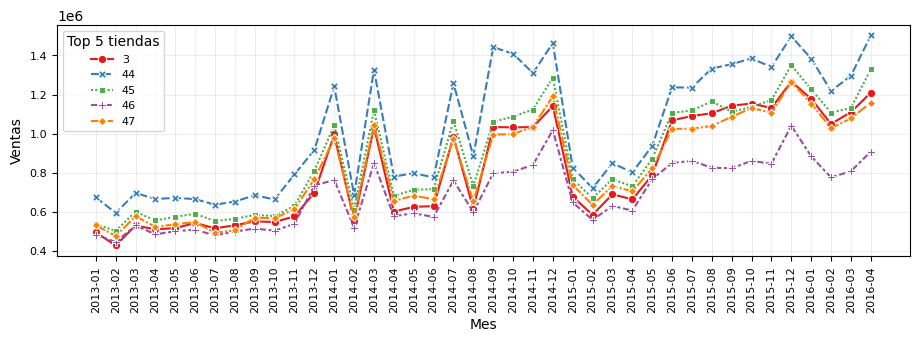

In [123]:
#Graficamos
# Veamos graficamente el historico de ventas de estas tiendas...

ax = sns.lineplot(
    data = df_top_5_final,
    x = 'periodo',
    y = 'sales',
    hue='store_nbr',
    style = "store_nbr",
    markers = True,
    palette='Set1' # Cambiando la paleta tampoco arreglamos el problema
)

# Otra forma de solamente cambiar la rotacion de las etiquetas sin definirlas
ax.tick_params(
    axis='x', 
    labelrotation = 90,
    labelsize = 8
)

ax.tick_params(
    axis='y', 
    labelsize = 8
)

ax.grid(
    visible=True,
    axis='x',
    alpha=0.2
)

ax.grid(
    visible=True,
    axis='y',
    alpha=0.2
)

ax.legend(
    title='Top 5 tiendas',
    bbox_to_anchor=(0, 1), 
    fontsize=8,
    loc='upper left'
)

ax.set_ylabel('Ventas')
ax.set_xlabel('Mes')

# Otra forma de cambiar el tamaño de una figura cuando solo partimos de un ax
fig = ax.get_figure()
fig.set_size_inches(11, 3)